In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
X = data.drop("target", axis=1)
y = data["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [5]:
train_data = pd.concat([X_train, y_train], axis=1)

## Basic Data Exploration 

In [6]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
51004,365,334,155,327,246,219,-6.855655,0.723383,0,376,...,14.933790,13.386415,5.936600,1.868574,1.649365,3.843327,10.040211,7.337309,3.374481,47.723383
11453,90,168,27,493,240,319,6.928203,0.815758,1,452,...,11.533649,9.318288,8.418168,12.077763,5.087408,9.814876,14.117136,1.130751,13.153551,48.815758
9691,179,61,295,381,221,123,7.071068,0.879372,1,444,...,10.744082,3.510075,13.226939,11.670545,4.215029,9.315037,8.924794,4.712087,8.274695,50.879372
51992,143,113,252,448,168,270,-8.485281,0.436866,0,15,...,5.332328,7.495729,9.813652,11.180262,13.423517,6.123297,8.282545,3.305054,8.142308,72.436866
23531,473,330,136,340,158,42,4.898979,0.284615,1,355,...,3.897225,3.917064,13.021452,8.636414,1.570601,3.685449,7.587186,10.078413,5.286552,24.284615


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72000 entries, 51004 to 15795
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       72000 non-null  int64  
 1   1       72000 non-null  int64  
 2   2       72000 non-null  int64  
 3   3       72000 non-null  int64  
 4   4       72000 non-null  int64  
 5   5       72000 non-null  int64  
 6   6       72000 non-null  float64
 7   7       72000 non-null  float64
 8   8       72000 non-null  int64  
 9   9       72000 non-null  int64  
 10  10      72000 non-null  int64  
 11  11      72000 non-null  int64  
 12  12      72000 non-null  int64  
 13  13      72000 non-null  float64
 14  14      72000 non-null  float64
 15  15      72000 non-null  float64
 16  16      72000 non-null  float64
 17  17      72000 non-null  float64
 18  18      72000 non-null  float64
 19  19      72000 non-null  float64
 20  20      72000 non-null  float64
 21  21      72000 non-null  float64

In [8]:
train_data.describe()


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,...,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000
mean,249.365792,249.926042,248.792722,249.683903,249.309542,249.644306,-0.021819,0.498508,0.498444,249.539069,...,7.474134,7.532602,7.497120,7.476657,7.484346,7.472623,7.510829,7.485390,7.512068,50.128494
std,144.529399,143.930568,144.188045,144.365659,143.865695,144.162292,7.044870,0.288947,0.500001,144.564177,...,4.327396,4.322037,4.334450,4.337307,4.336850,4.324672,4.320638,4.328067,4.329590,28.870726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000254,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,124.000000,126.000000,124.000000,124.000000,125.000000,125.000000,-7.071068,0.248093,0.000000,124.000000,...,3.712425,3.805311,3.745525,3.714611,3.721380,3.712629,3.781087,3.734404,3.765175,25.271606
50%,250.000000,250.000000,248.000000,250.000000,250.000000,249.000000,0.000000,0.497292,0.000000,250.000000,...,7.471837,7.554330,7.475675,7.462569,7.488233,7.470323,7.522968,7.477458,7.507912,50.145938
75%,374.000000,374.000000,374.000000,375.000000,373.000000,374.000000,7.071068,0.748156,1.000000,375.000000,...,11.217533,11.282844,11.256550,11.222019,11.241745,11.203639,11.254549,11.224660,11.274198,75.145585
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999417,14.999869,14.999145,14.999948,14.999364,14.999775,99.999482


In [9]:
train_data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

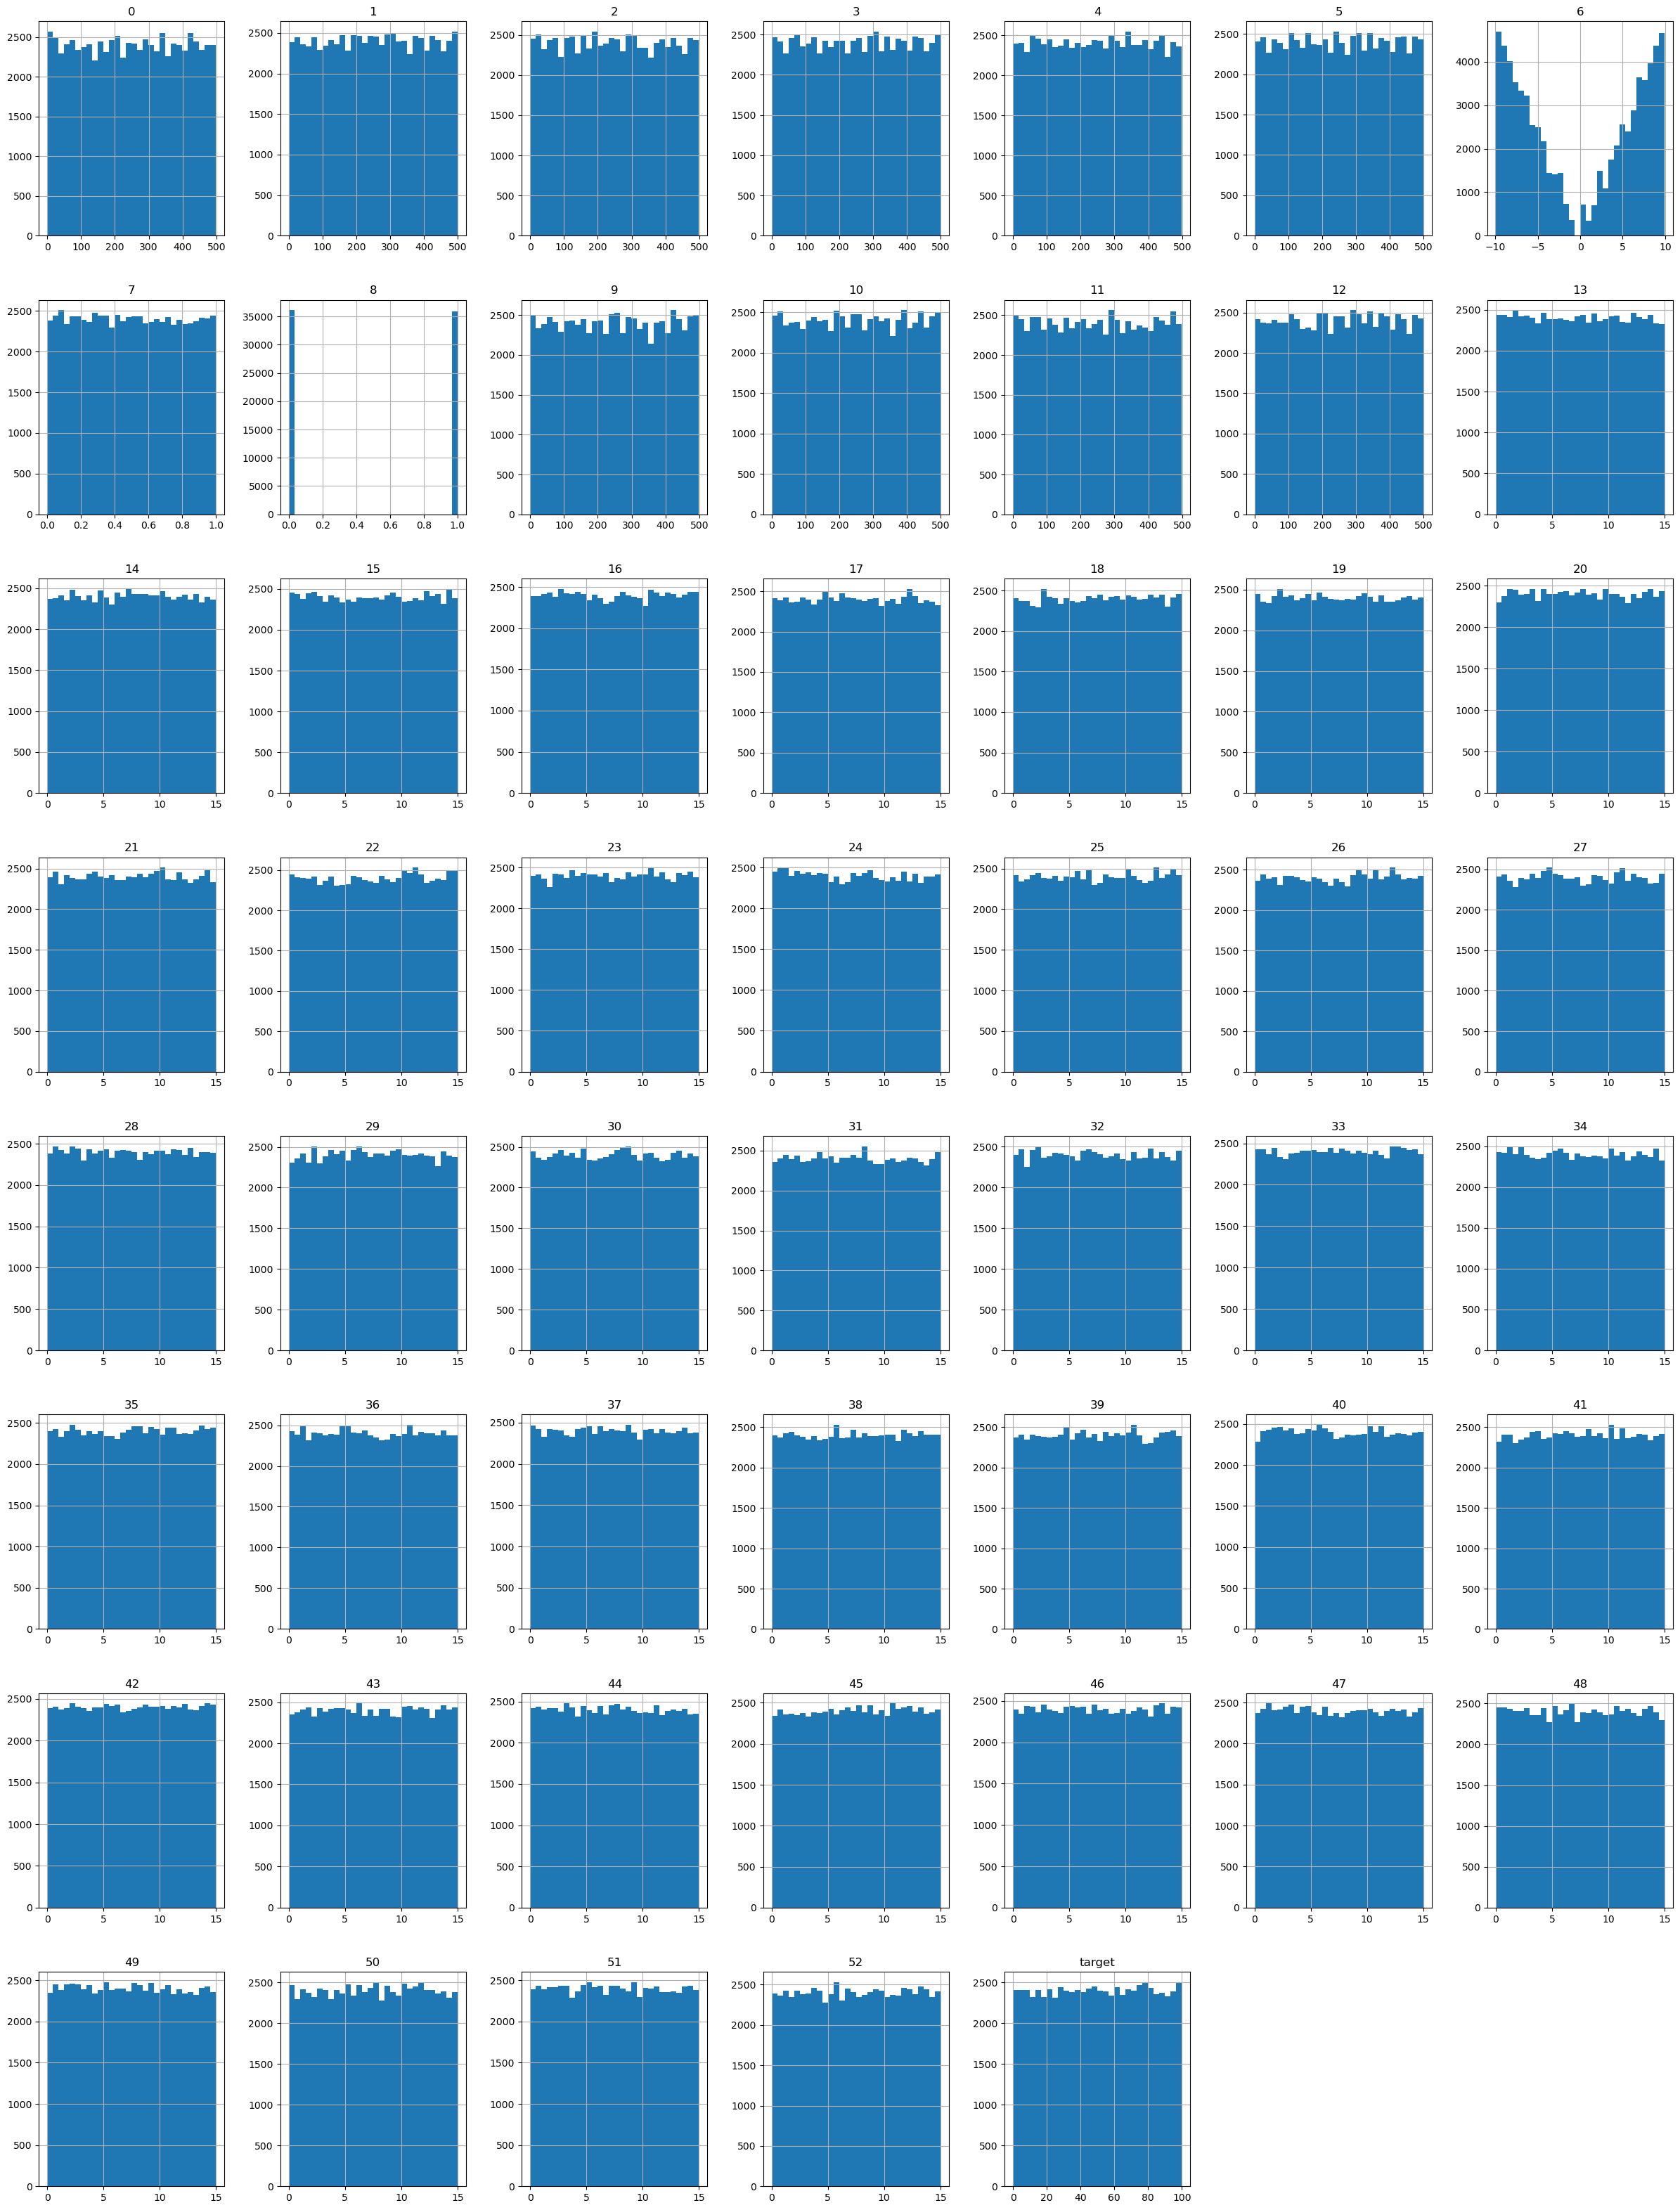

In [10]:
train_data.hist(bins=30, figsize=(30, 40))
plt.show()

In [11]:
correlations = train_data.corr()
correlations["target"].sort_values(ascending=False)


target    1.000000
7         0.010671
36        0.006439
39        0.006084
26        0.005108
28        0.004771
44        0.004618
10        0.003786
37        0.003511
49        0.003273
12        0.003133
4         0.002904
21        0.002531
15        0.002424
0         0.002087
3         0.001952
24        0.001915
16        0.001748
17        0.001513
31        0.001507
34        0.001369
19        0.001203
22        0.001157
25        0.000934
42        0.000220
23        0.000199
8         0.000048
46       -0.000210
18       -0.000346
6        -0.000383
20       -0.000409
14       -0.000576
47       -0.000619
32       -0.000693
11       -0.000912
5        -0.000996
9        -0.001055
43       -0.001117
2        -0.001247
51       -0.001256
33       -0.001475
30       -0.001604
45       -0.001693
52       -0.002029
48       -0.002308
27       -0.002492
13       -0.002996
29       -0.003108
38       -0.003939
41       -0.004658
50       -0.008197
35       -0.008198
1        -0.

bardzo nisko skorelowane wejścia z Targetem

<AxesSubplot:>

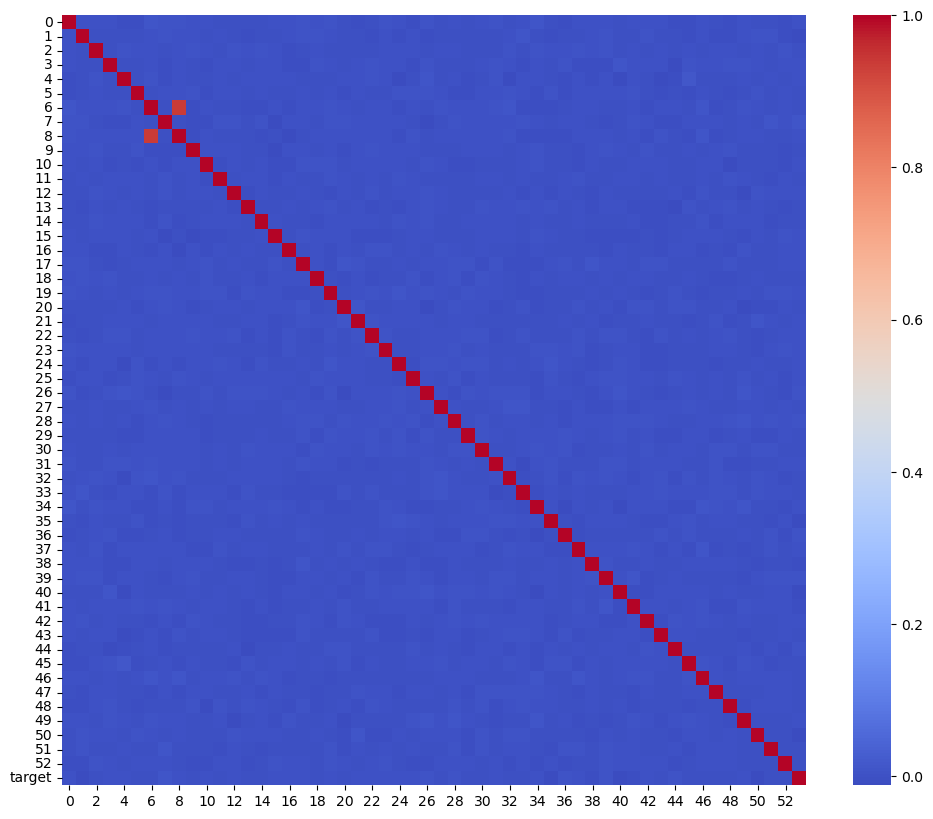

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=False, cmap="coolwarm")

In [13]:
print(f"Pearson correlation beetwen feature 6 and 8: {correlations['8']['6']:.4f}")

Pearson correlation beetwen feature 6 and 8: 0.9404


In [14]:
point_biserial_results = pointbiserialr(train_data['6'], train_data['8'])

print(f"Point biserial correlation coefficient: {point_biserial_results.correlation:.4f}")

Point biserial correlation coefficient: 0.9404


NOTES

- Target variable
	- Float data type
	- Uniform distribution
- Weak correlation between inputs and Target
- Feature correlations
	- Features 8 and 6 significantly correlated (0.9404)
	- Other inputs mostly uncorrelated
- Feature histograms
	- Features 8 and 6 distinct from the rest
	- Majority of features show a uniform distribution
- Approximate feature ranges
	- Features 1-5, 9-12: 0 to 500 (uniform)
	- Feature 6: -10 to 10 (fewer values near zero)
	- Feature 7: 0 to 1 (uniform)
	- Feature 8: 0 and 1 (binary - balanced)
	- Features 13-52: 0 to 15 (uniform)
	- Target: 0 to 100 (uniform)
- Missing Values
	- There is no missing values
- Outliers
	- There is no outliers. Based on the histograms.

## Model Baseline

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [16]:
X = train_data.drop("target", axis=1)
y = train_data["target"]

In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [18]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

In [19]:
cv_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)

In [20]:
mean_rmse = np.mean(cv_scores)
print("Mean RMSE from 3-fold cross-validation:", mean_rmse)

Mean RMSE from 3-fold cross-validation: -0.006079087683454255


NOTES

- Mean RMSE from 3-fold cross-validation for Model Baseline: 0.006079087683454255

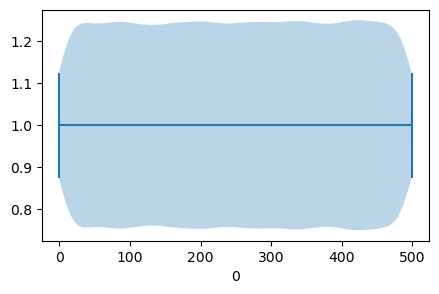

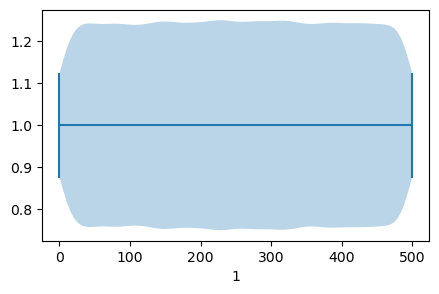

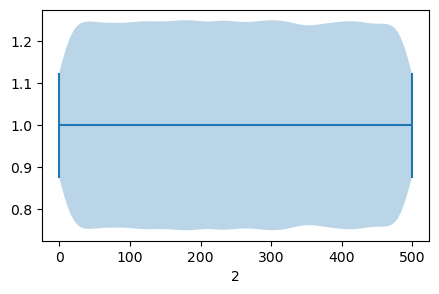

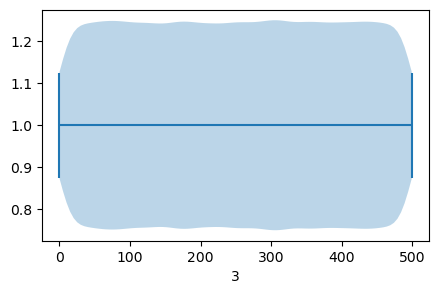

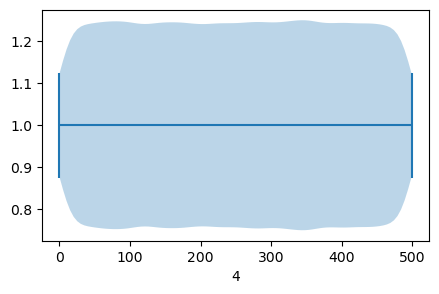

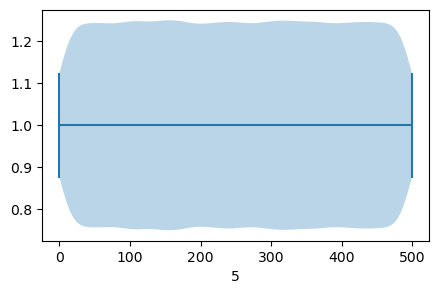

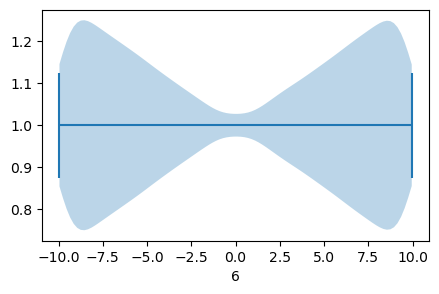

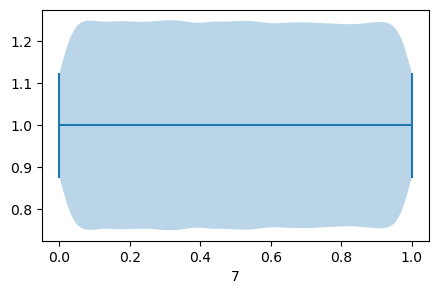

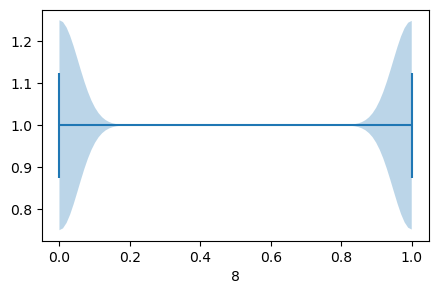

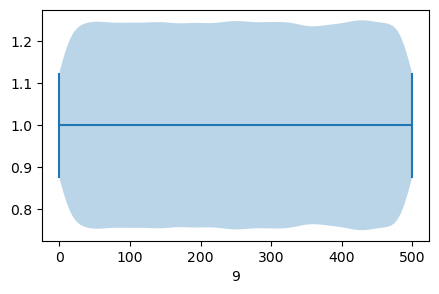

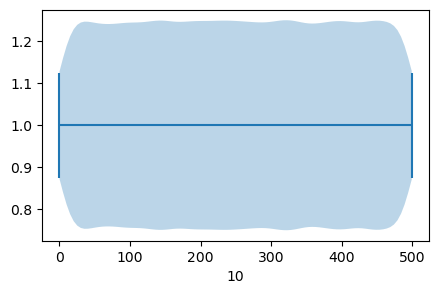

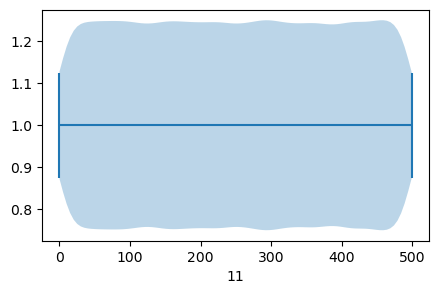

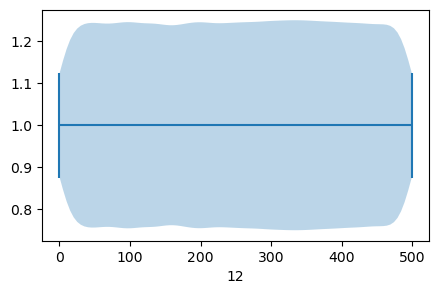

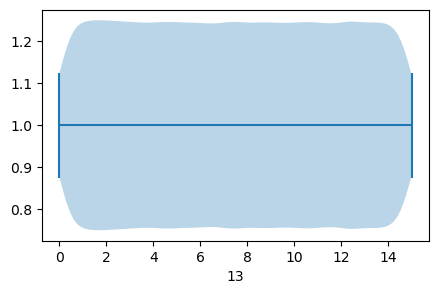

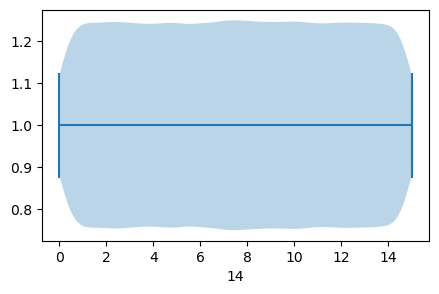

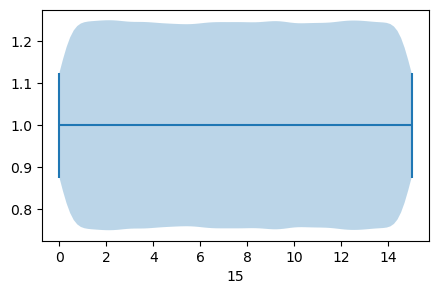

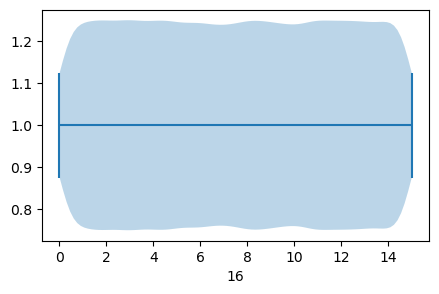

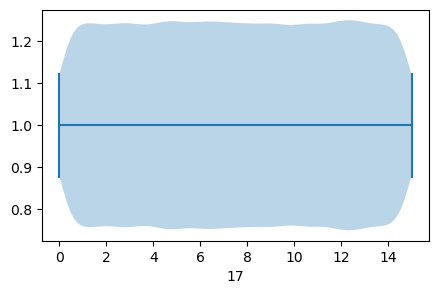

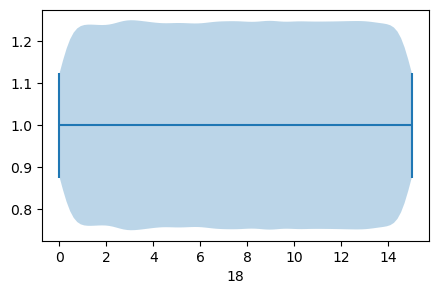

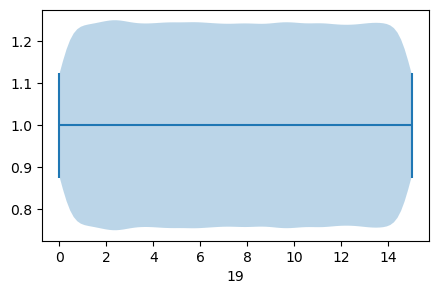

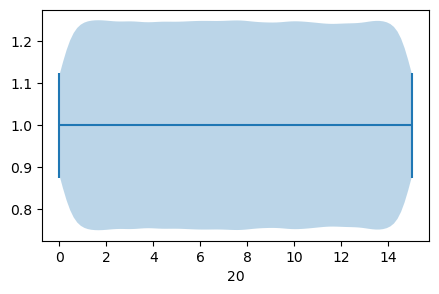

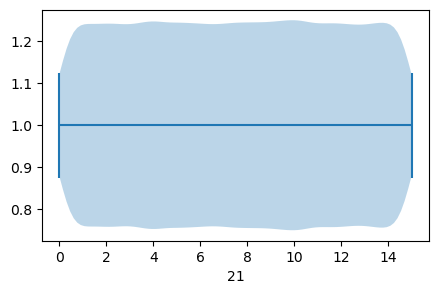

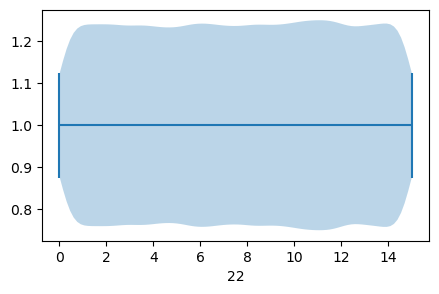

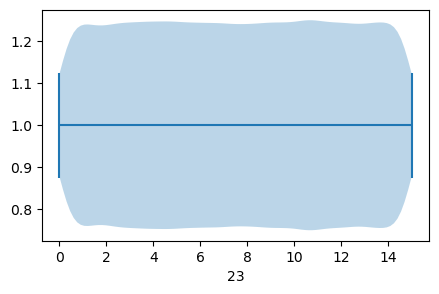

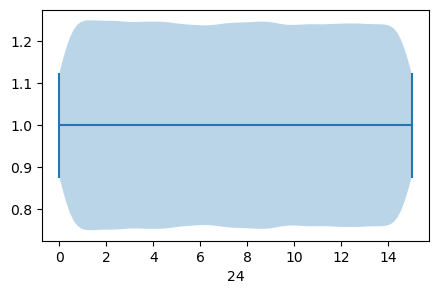

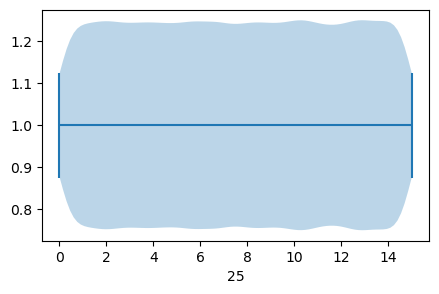

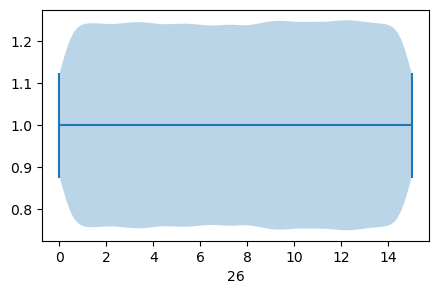

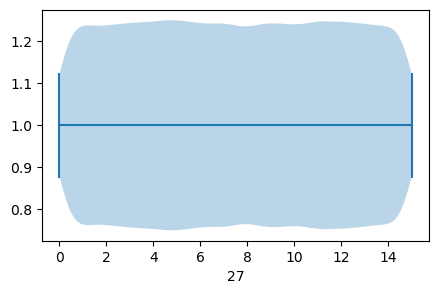

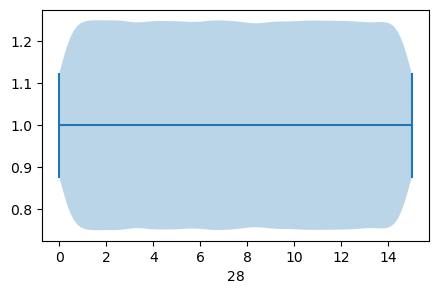

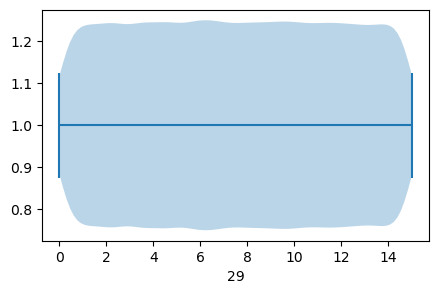

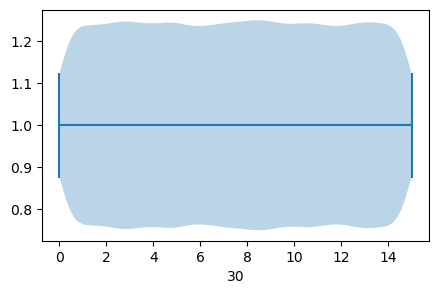

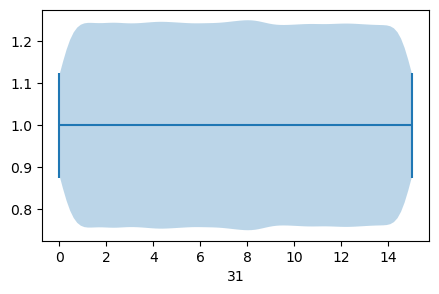

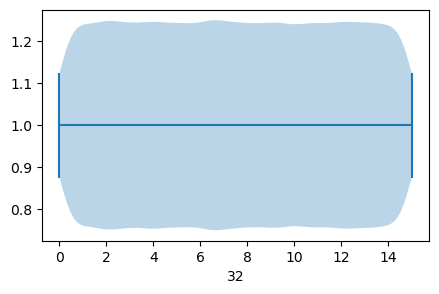

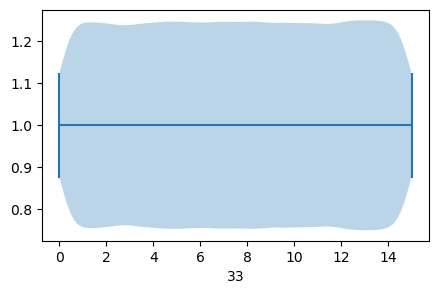

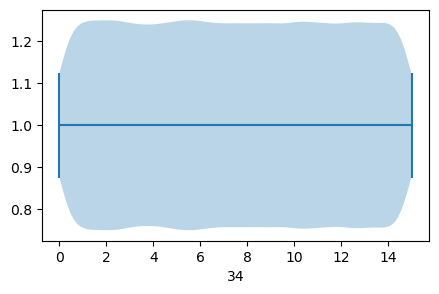

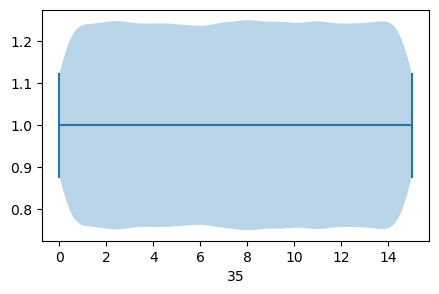

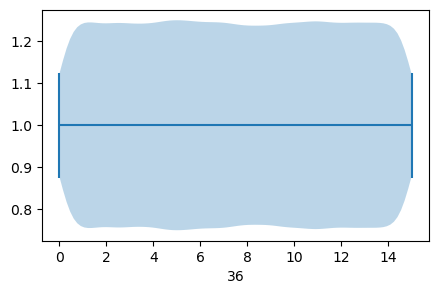

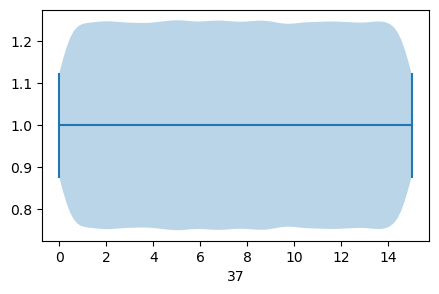

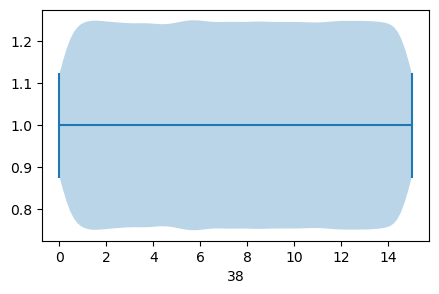

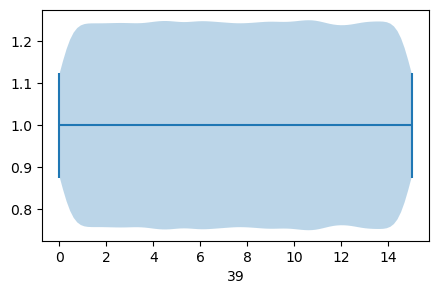

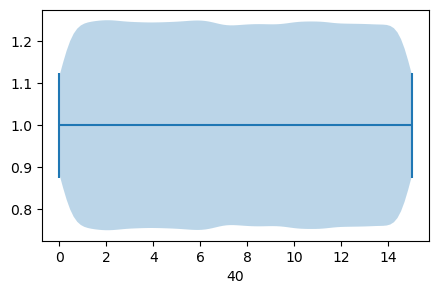

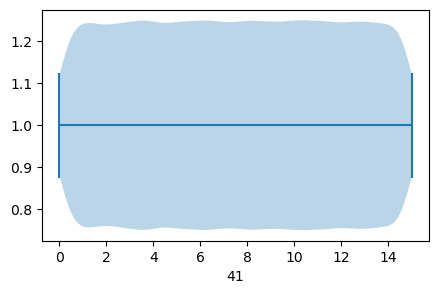

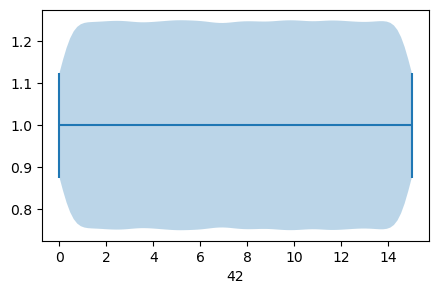

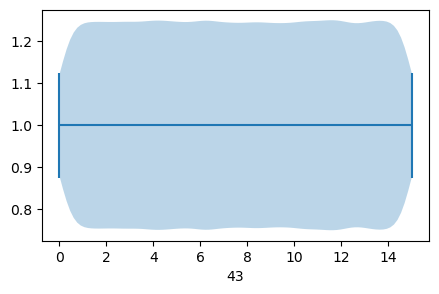

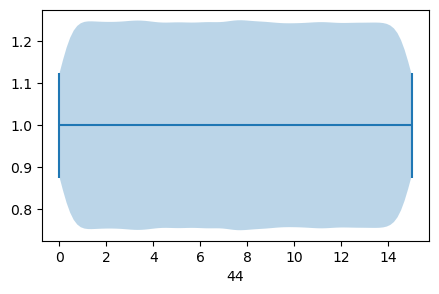

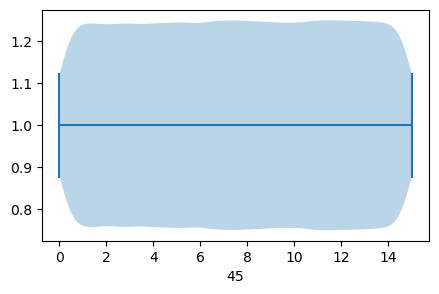

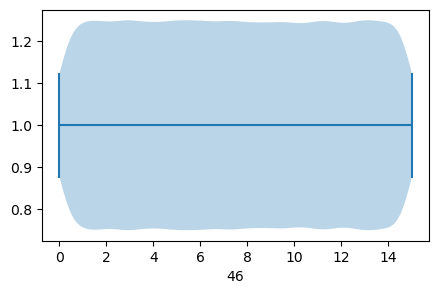

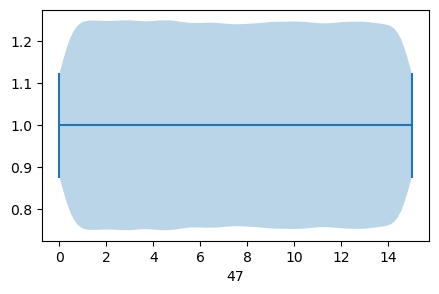

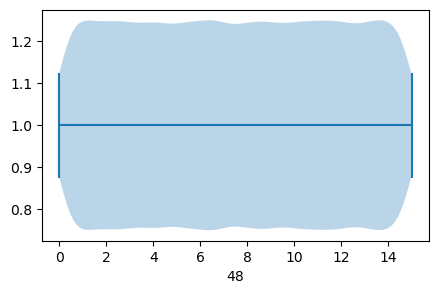

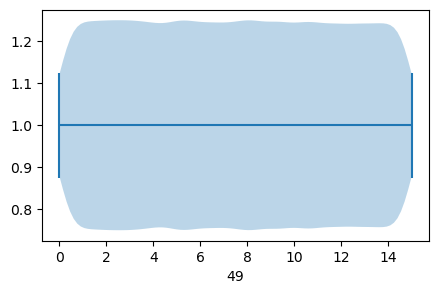

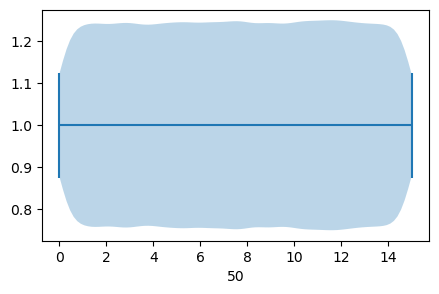

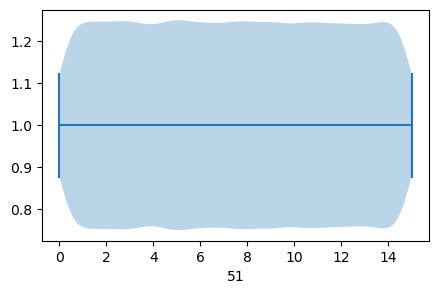

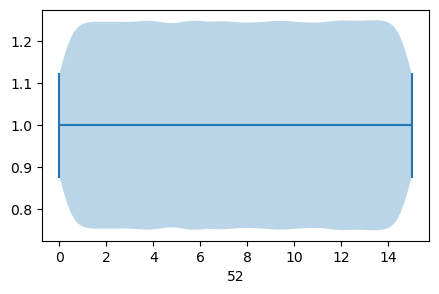

In [24]:
for column in X.columns:
    plt.figure(figsize=(5, 3))
    plt.violinplot(X[column], vert=False)
    plt.xlabel(column)
    plt.show()

In [ ]:
rmse_scores_clean_cv = []

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Usuń outlierów tylko ze zbioru treningowego
    train_data_fold = pd.concat([X_train, y_train], axis=1)
    clean_train_data_fold = train_data_fold.copy()
    for column in X.columns:
        clean_train_data_fold = remove_outliers(clean_train_data_fold, column)
    
    # Uaktualnij X_train i y_train po usunięciu outlierów
    X_train_clean = clean_train_data_fold.drop("target", axis=1)
    y_train_clean = clean_train_data_fold["target"]
    
    # Trenuj model na oczyszczonych danych treningowych
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_clean, y_train_clean)
    
    # Przewiduj wartości na zbiorze walidacyjnym
    y_pred = model.predict(X_val)
    
    # Oblicz RMSE dla tego foldu i dodaj go do listy wyników
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores_clean_cv.append(rmse)

# Oblicz średni RMSE dla walidacji krzyżowej
mean_rmse_clean_cv = np.mean(rmse_scores_clean_cv)
print(f"Mean RMSE after removing outliers (cross-validation): {mean_rmse_clean_cv}")